In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
from google.colab import files

In [2]:
tracks = {'march':'https://github.com/HasarinduPerera/waypoint-map/blob/main/tracks/2022_summit_speedway.npy?raw=true/', 
          'april':'https://github.com/terrablader11/waypoint-map/blob/main/tracks/2022_march_open.npy?raw=true/', 
          'may':'https://github.com/terrablader11/waypoint-map/blob/main/tracks/2022_april_open.npy?raw=true/', 
          'june':'https://github.com/terrablader11/waypoint-map/blob/main/tracks/2022_may_open.npy?raw=true/'}

### Replace `march` with the month you want. Then run rest of the code.

Example: `month = 'may'`

In [3]:
month = 'march'

In [4]:
get_track = tracks[month]

In [5]:
response = requests.get(get_track)
print(response.raise_for_status())
data = np.load(io.BytesIO(response.content))
np.save(f'{month}.npy', data)

None


In [6]:
track = np.load(f'{month}.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

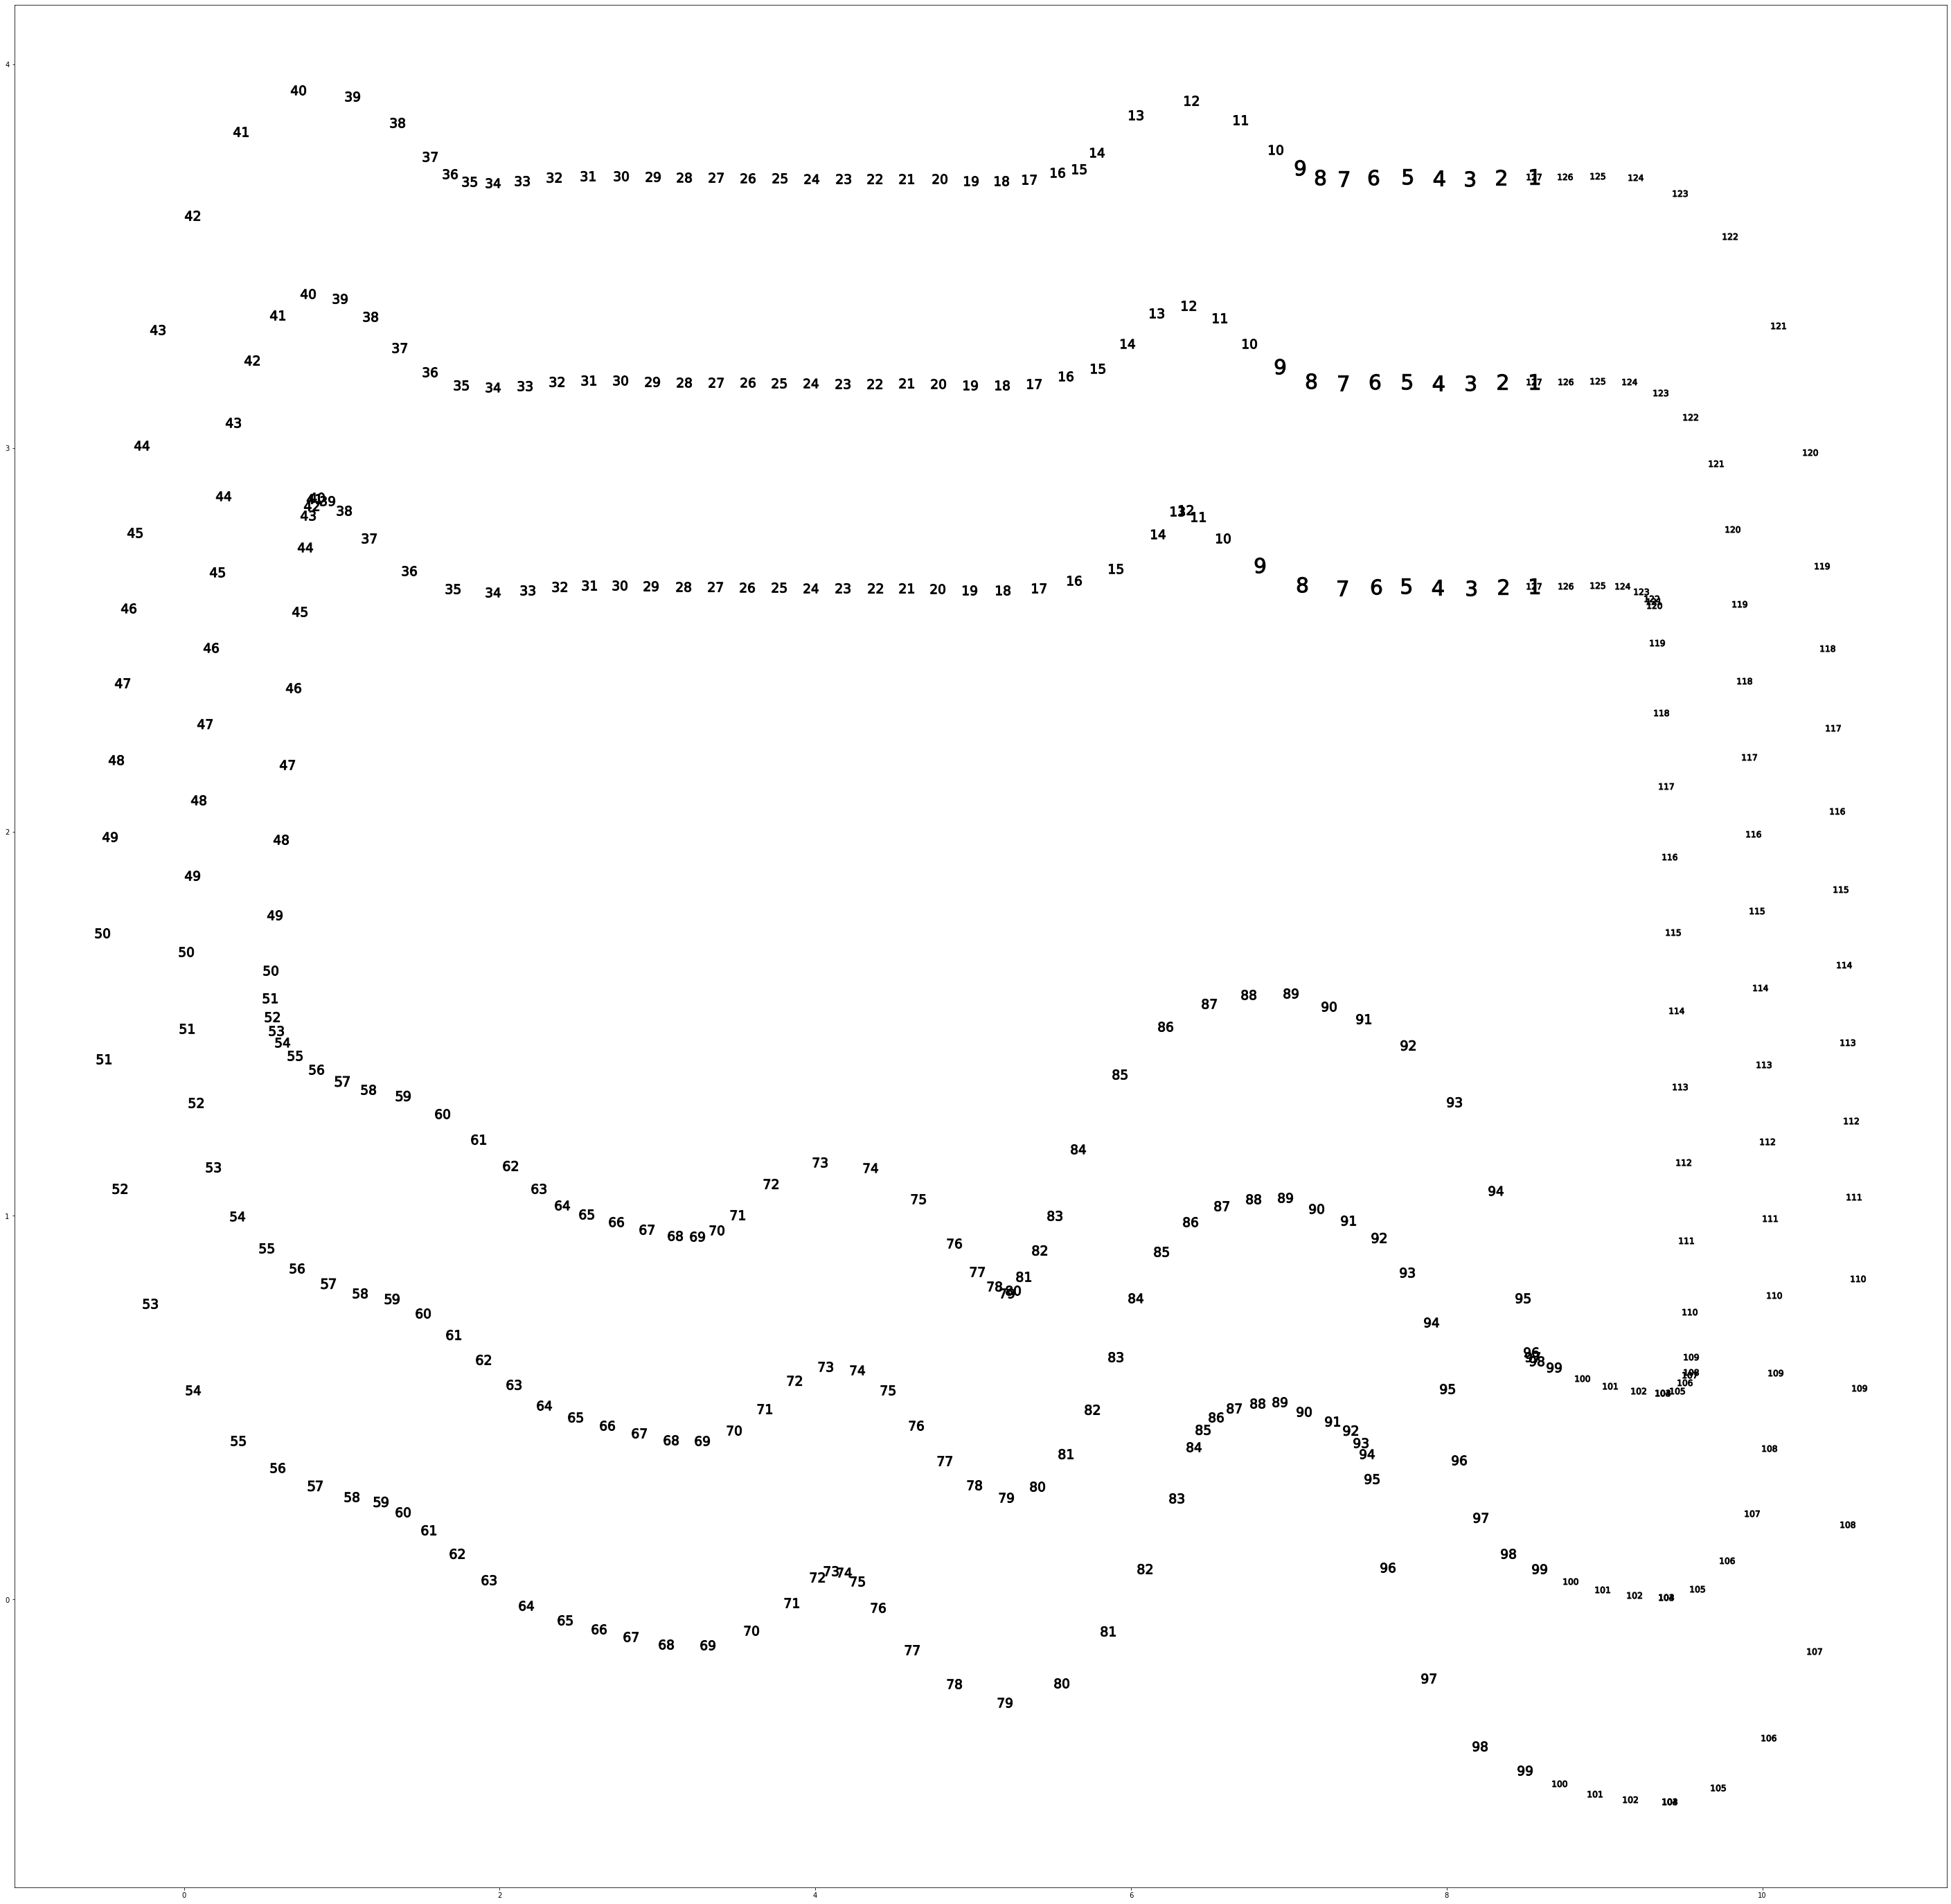

In [7]:
plt.rcParams['figure.figsize'] = [50, 50]
for x in range(int((track.size)/6)):
  waypoint = track[x]
  str1="$"
  str2=str(x+1)
  str3=str1+str2+str1
  for y in range(3):
    waypointx = waypoint[2*y]
    waypointy = waypoint[2*y+1]
    plt.scatter(waypointx, waypointy, marker=str3, s=500, c='black')

plt.savefig(f'{month}.png')
files.download(f'{month}.png')